### the effects of varying min_samples

C:\Users\Asus\AppData\Local\Temp\ipykernel_10336\775479190.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')
C:\Users\Asus\AppData\Local\Temp\ipykernel_10336\775479190.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')


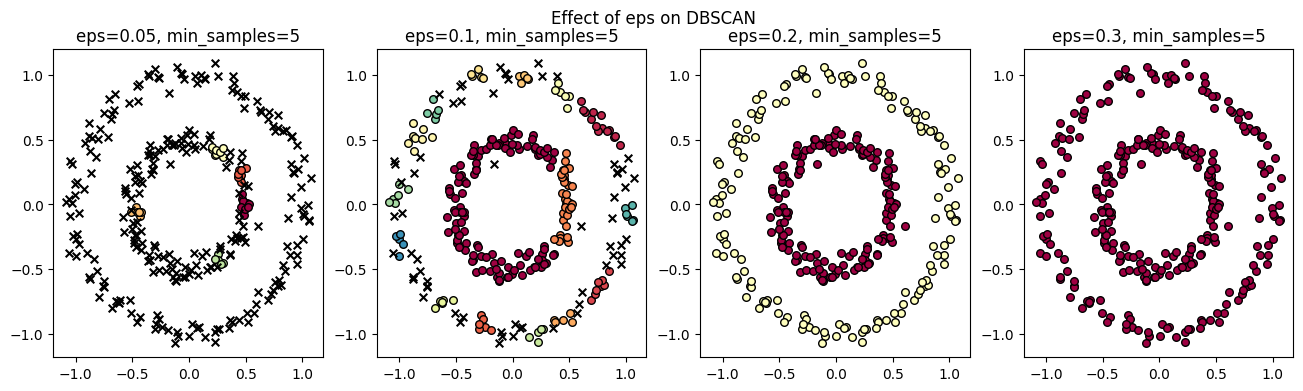

C:\Users\Asus\AppData\Local\Temp\ipykernel_10336\775479190.py:45: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')
C:\Users\Asus\AppData\Local\Temp\ipykernel_10336\775479190.py:45: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')
C:\Users\Asus\AppData\Local\Temp\ipykernel_10336\775479190.py:45: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[labe

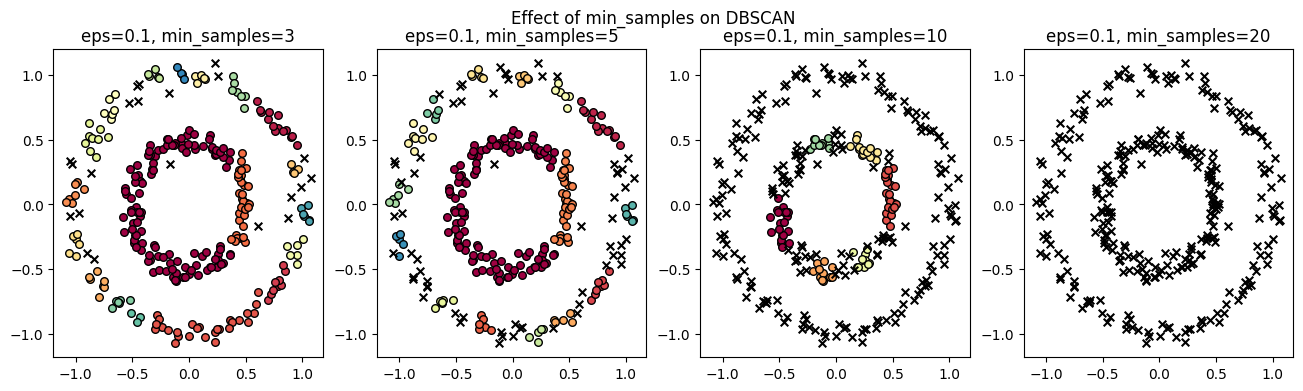

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate concentric circles dataset
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

# Plot the effects of varying eps
eps_values = [0.05, 0.1, 0.2, 0.3]
min_samples_fixed = 5
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax, eps in zip(axes, eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples_fixed).fit(X)
    labels = dbscan.labels_
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            color = 'k'  # Noise points
            marker = 'x'
        else:
            color = plt.cm.Spectral(label / len(unique_labels))
            marker = 'o'
        ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')
    ax.set_title(f"eps={eps}, min_samples={min_samples_fixed}")

plt.suptitle("Effect of eps on DBSCAN")
plt.show()

# Plot the effects of varying min_samples
min_samples_values = [3, 5, 10, 20]
eps_fixed = 0.1
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax, min_samples in zip(axes, min_samples_values):
    dbscan = DBSCAN(eps=eps_fixed, min_samples=min_samples).fit(X)
    labels = dbscan.labels_
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            color = 'k'  # Noise points
            marker = 'x'
        else:
            color = plt.cm.Spectral(label / len(unique_labels))
            marker = 'o'
        ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, marker=marker, s=30, edgecolor='k')
    ax.set_title(f"eps={eps_fixed}, min_samples={min_samples}")

plt.suptitle("Effect of min_samples on DBSCAN")
plt.show()


### Fixed eps value and varying min_samples

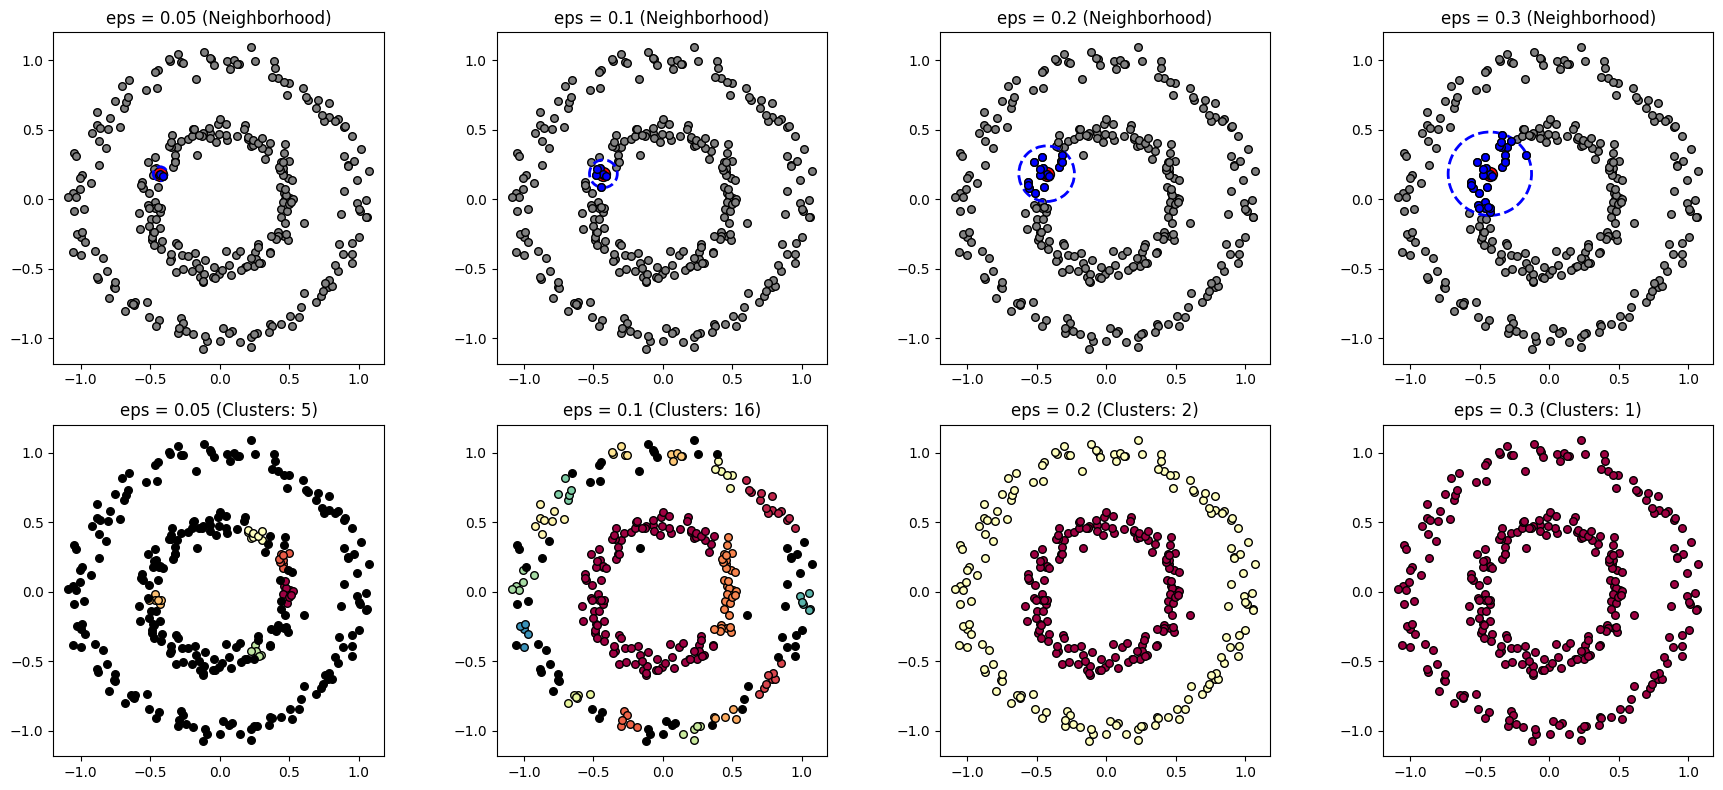

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate concentric circles dataset
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

# Select a single reference point
reference_point = X[150]

# Different eps values to show neighborhoods
eps_values = [0.05, 0.1, 0.2, 0.3]
min_samples = 5

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for i, eps in enumerate(eps_values):
    # Plot eps neighborhood (Top row)
    ax = axes[0, i]
    ax.scatter(X[:, 0], X[:, 1], s=30, color='gray', edgecolor='k')  # All points
    ax.scatter(reference_point[0], reference_point[1], color='red', s=100, edgecolor='k')  # Reference point
    circle = plt.Circle(reference_point, eps, color='blue', fill=False, linewidth=2, linestyle='dashed')
    ax.add_artist(circle)
    neighbors = X[np.linalg.norm(X - reference_point, axis=1) <= eps]
    ax.scatter(neighbors[:, 0], neighbors[:, 1], color='blue', s=30, edgecolor='k')
    ax.set_title(f"eps = {eps} (Neighborhood)")
    ax.set_aspect('equal')

    # DBSCAN Clustering result (Bottom row)
    ax = axes[1, i]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)
    
    for label in unique_labels:
        color = 'k' if label == -1 else plt.cm.Spectral(label / len(unique_labels))
        ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, s=30, edgecolor='k')
    ax.set_title(f"eps = {eps} (Clusters: {n_clusters})")
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


### Fixed eps value and varying min_samples

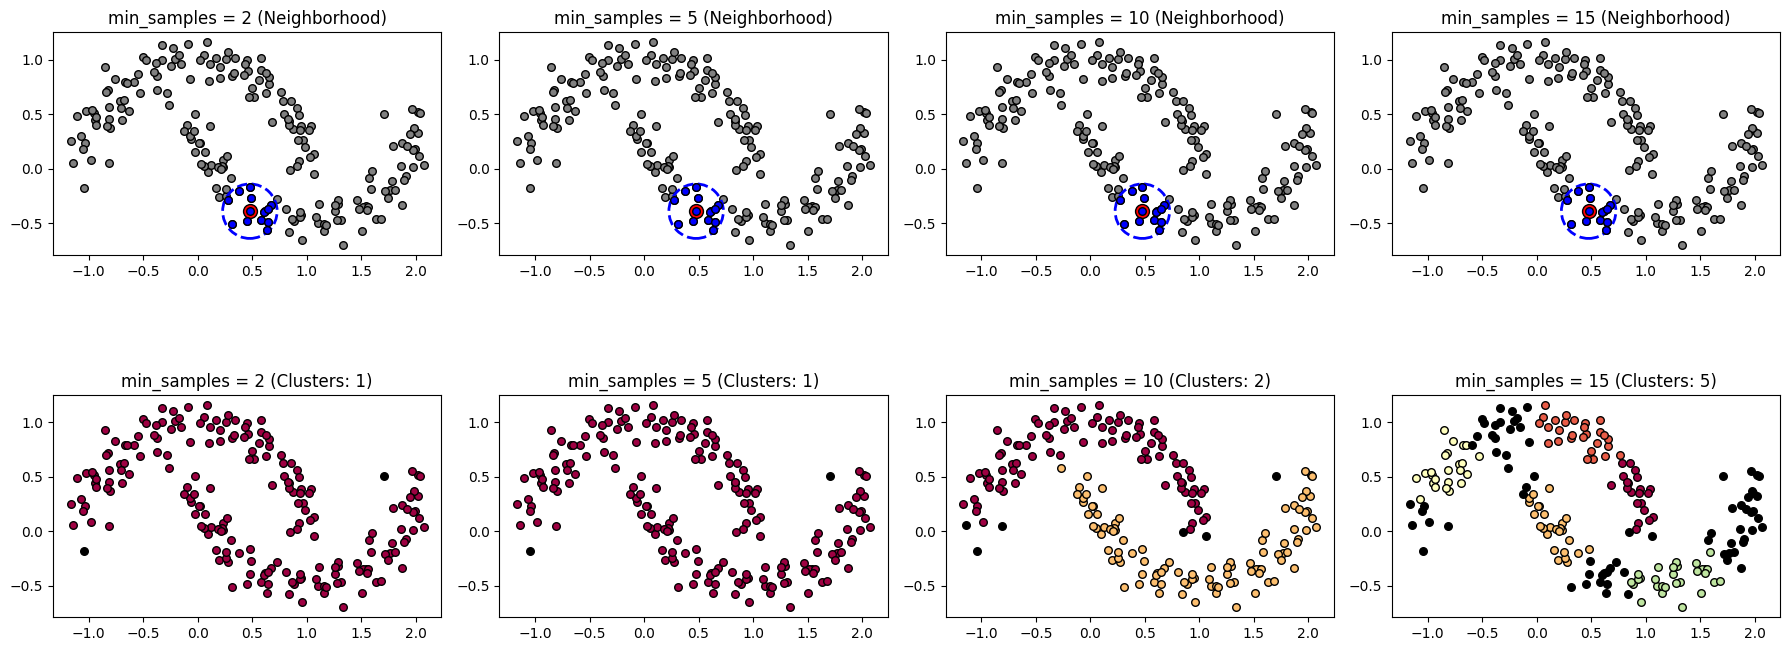

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

# Generate concentric circles dataset
X, _ = make_moons(n_samples=200, noise=0.1, random_state=0)

# Select a single reference point
reference_point = X[150]

# Fixed eps value and varying min_samples
eps = 0.25
min_samples_values = [2, 5, 10, 15]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for i, min_samples in enumerate(min_samples_values):
    # Plot eps neighborhood (Top row)
    ax = axes[0, i]
    ax.scatter(X[:, 0], X[:, 1], s=30, color='gray', edgecolor='k')  # All points
    ax.scatter(reference_point[0], reference_point[1], color='red', s=100, edgecolor='k')  # Reference point
    circle = plt.Circle(reference_point, eps, color='blue', fill=False, linewidth=2, linestyle='dashed')
    ax.add_artist(circle)
    neighbors = X[np.linalg.norm(X - reference_point, axis=1) <= eps]
    ax.scatter(neighbors[:, 0], neighbors[:, 1], color='blue', s=30, edgecolor='k')
    ax.set_title(f"min_samples = {min_samples} (Neighborhood)")
    ax.set_aspect('equal')

    # DBSCAN Clustering result (Bottom row)
    ax = axes[1, i]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)
    
    for label in unique_labels:
        color = 'k' if label == -1 else plt.cm.Spectral(label / len(unique_labels))
        ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color, s=30, edgecolor='k')
    ax.set_title(f"min_samples = {min_samples} (Clusters: {n_clusters})")
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()
